In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [63]:
# Extrair o link da matéria
def extrair_link_materia(materia):
    link_element = materia.find('a', class_='feed-post-link gui-color-primary gui-color-hover')
    link = link_element['href'] if link_element else ''
    return {'Link Materia': link}

# Extrair links de todas as matérias da página
def extrair_todos_links_materias(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        materias = soup.find_all('div', class_='_evt')

        links_materias = set()
        for materia in materias:
            link_info = extrair_link_materia(materia)
            link = link_info['Link Materia']
            if link:
                links_materias.add(link)

        return pd.DataFrame({'Link Materia': list(links_materias)})
    else:
        print(f'Erro ao acessar {url}')
        return pd.DataFrame()

In [64]:
# DataFrame vazio para armazenar os links
df_links_materias = pd.DataFrame()

# Iterar de 1 a 8 e extrair os links
for page in range(1, 9):
    url = f'https://ge.globo.com/jogos-pan-americanos/index/feed/pagina-{page}.ghtml'
    df_links_materias = pd.concat([df_links_materias, extrair_todos_links_materias(url)], ignore_index=True)


In [65]:
# Exibir o DataFrame de links
print("DataFrame de Links das Matérias:")
print(df_links_materias)

# Salvar o DataFrame de links em um arquivo CSV
df_links_materias.to_csv('links_materias_ge.csv', index=False)

DataFrame de Links das Matérias:
                                         Link Materia
0   https://ge.globo.com/olimpiadas/noticia/2023/1...
1   https://ge.globo.com/jogos-pan-americanos/noti...
2   https://ge.globo.com/premio-brasil-olimpico/no...
3   https://ge.globo.com/pi/badminton/noticia/2023...
4   https://ge.globo.com/jogos-pan-americanos/noti...
5   https://ge.globo.com/jogos-pan-americanos/noti...
6   https://ge.globo.com/olimpiadas/noticia/2023/1...
7   https://ge.globo.com/jogos-pan-americanos/noti...
8   https://ge.globo.com/jogos-pan-americanos/noti...
9   https://ge.globo.com/olimpiadas/noticia/2023/1...
10  https://ge.globo.com/pi/atletismo/noticia/2023...
11  https://ge.globo.com/jogos-pan-americanos/noti...
12  https://ge.globo.com/jogos-pan-americanos/noti...
13  https://ge.globo.com/pr/futebol/times/athletic...
14  https://ge.globo.com/jogos-pan-americanos/noti...
15  https://ge.globo.com/jogos-pan-americanos/noti...
16  https://ge.globo.com/jogos-pan-americanos/not

In [343]:
import re
import unicodedata
# Após rodar a aranha materias_ge.py, irei realizar alguns tratamentos de limpeza dos dados gerados: 

#Importar arquivo gerado pela aranha
df = pd.read_csv('/Users/juannvictor/Documents/vcCode/Faculdade/Python/Rec_Info_Web/T6/materias_ge.csv')

# Limpar os campos Titulo Materia, Subtitulo e Texto Materia
df['Titulo Materia'] = df['Titulo Materia'].str.replace(r'\b(Pan|2023|Jogos|Pan-Americanos)\b', '', regex=True, case=False)
df['Subtitulo'] = df['Subtitulo'].str.replace(r'\b(Pan|2023|Jogos|Pan-Americanos)\b', '', regex=True, case=False)
df['Texto da materia'] = df['Texto da materia'].str.replace(r'\b(Pan|2023|Jogos|Pan-Americanos)\b', '', regex=True, case=False)

# Excluir aspas duplas, dois pontos e o sufixo "-Americanos"
df['Titulo Materia'] = df['Titulo Materia'].str.replace(r'["\':-]', '', regex=True)
df['Subtitulo'] = df['Subtitulo'].str.replace(r'["\':-]', '', regex=True)
df['Texto da materia'] = df['Texto da materia'].str.replace(r'["\':-]', '', regex=True)

# Remover espaços em branco no início e garantir que a primeira letra seja maiúscula
df['Titulo Materia'] = df['Titulo Materia'].str.strip().str.capitalize()
df['Subtitulo'] = df['Subtitulo'].str.strip().str.capitalize()
df['Texto da materia'] = df['Texto da materia'].str.strip().str.capitalize()

# Função para remover acentos e caracteres especiais
def remove_special_characters(text):
    # Remover acentos
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    # Remover caracteres especiais, vírgulas, pontos e hifens
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Aplicar a função a cada campo
df['Titulo Materia'] = df['Titulo Materia'].apply(remove_special_characters)
df['Subtitulo'] = df['Subtitulo'].apply(remove_special_characters)
df['Texto da materia'] = df['Texto da materia'].apply(remove_special_characters)

# Salvar o DataFrame de volta ao arquivo CSV
df.to_csv('materias_ge_limpo.csv', index=False)


Text(0.5, 1.0, 'Titulo Materia')

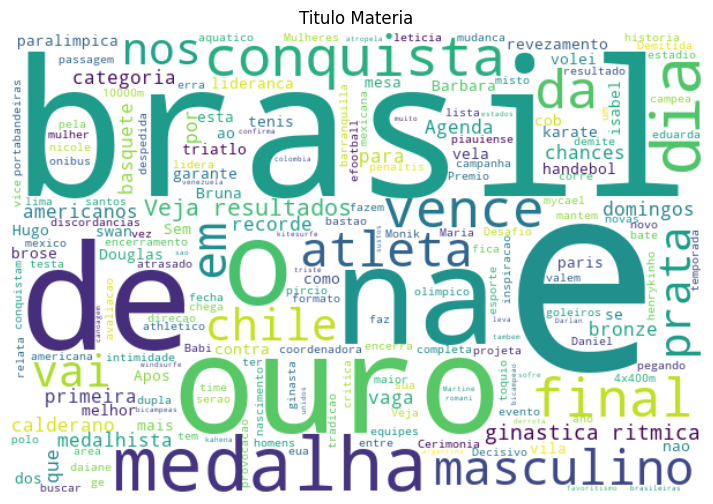

In [344]:
#Análise de nuvem de palavras de cada campo de texto (sem excluir as stop words)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv('materias_ge_limpo.csv')

# Concatenar todos os textos de cada campo
all_title_text = ' '.join(df['Titulo Materia'])
all_subtitle_text = ' '.join(df['Subtitulo'])
all_text_text = ' '.join(df['Texto da materia'])

# Gerar nuvem de palavras para o campo Titulo Materia
wordcloud_title = WordCloud(width=600, height=400, background_color='white').generate(all_title_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Titulo Materia')


Text(0.5, 1.0, 'Subtitulo')

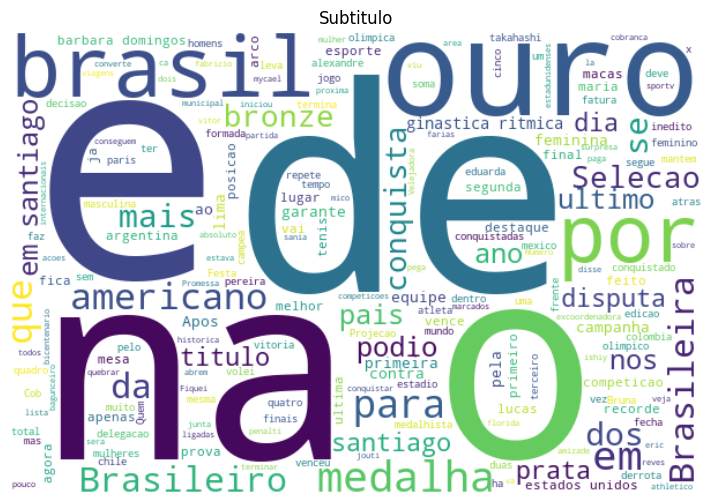

In [345]:
# Gerar nuvem de palavras para o campo Subtitulo
wordcloud_subtitle = WordCloud(width=600, height=400, background_color='white').generate(all_subtitle_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_subtitle, interpolation='bilinear')
plt.axis('off')
plt.title('Subtitulo')

Text(0.5, 1.0, 'Texto da materia')

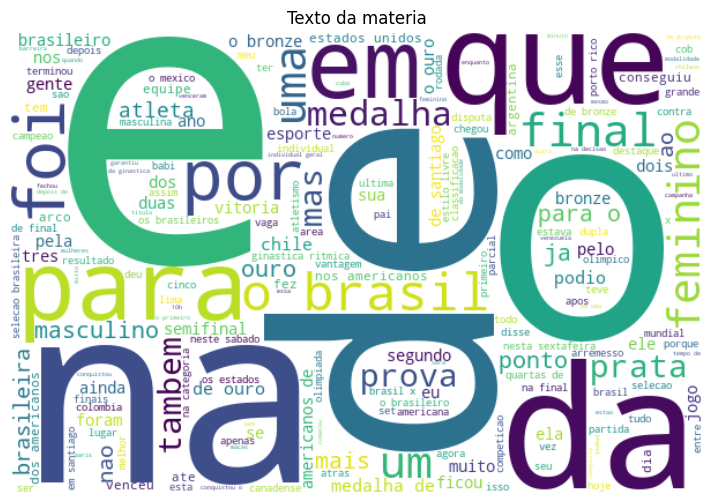

In [346]:
# Gerar nuvem de palavras para o campo Texto da materia
wordcloud_text = WordCloud(width=600, height=400, background_color='white').generate(all_text_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis('off')
plt.title('Texto da materia')

In [447]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

# Lista de palavras de parada para cada campo
stopwords_title = set(['na', 'em', 'e', 'da', 'é', 'sem', 'são', 'por', 'da', 'testa', 'fica', 'time', 'cob', 'tem', 'dia', 'vai', 'vila', 'não', 'mantém', 'veja', 'ao', 'lista', 'para', 'mais', 'faz', 'se', 'que', '000m', 'mesa', 'como', 'dupla', 'erra', 'após', 'à', 'serão','teve', 'seleção', 'vez', 'isso', 'última', 'ter', 'tem', 'ano', 'set', 'são', 'chegou', 'agora', 'fez', 'ficou', 'babi', 'ela', 'apenas', 'como', 'gente', 'equipe', 'mais', 'dia', 'estava', 'pelo', 'melhor', 'após', 'dupla', 'bola', 'à','o',
                      'até', 'ano', 'time', 'cinco', 'depois', 'esse', 'outra', 'brasil x', 'ela', 'seu', 'lima', 'está', 'x', 'tudo', 'misto','então', 'fita', 'disse', 'nas', 'só', 'uma', 'nos', 'se', 'da','não','o','ainda', 'sextafeira', 'total', 'vitória', 'partida', 'dois',
                      'essa', 'lado', 'às', 'os brasileiros','conseguiu', 'esporte', 'cob', 'ano', 'hoje', 'contra', 'tempo', 'segundo', 'pódio', 'decisão', 'jogo','terminou', 'estão', 'conquistou', 'final', 'decisão', 'quarta', 'porque', 'vai', 'brasileira', 'brasileiro',
                      'masculino', 'feminino', 'prova', 'americanos','das', 'venceu', 'bronze', 'prova', 'santiago', 'prata', 'medalha', 'os estados', '10h', 'modalidade', 'individual', 'além', 'grande','lugar', 'finais', 'neste sábado','de', 'brasil',
                      'resultado', 'conquista', 'atleta', 'ouro','medalhas', 'recorde', 'douglas', 'isabel', 'calderano', 'brose', 'primeira', 'agenda', 'os', 'domingos','resultados', 'chances', 'medalhista', 'vence','vaga', 'chile', 'categoria','paris','dos','atletas','ouro','hugo',
                      'paralímpica', 'prata', 'liderança', 'garante','encerra', 'completa', 'cerimônia', 'no', 'do', 'a','com', ',','3/11', '2/11','bruna', 'fecha','205', 'medalhas,','medalhas;', 'lidera','equipes', 'evento','passagem','barranquilla', 'mulheres','fazem','campanha',
                      'homens','pela','história','demitida','cob,','swan','relata','discordâncias','direção','buscar','apos','barbara','nao','lideranca','esta'])

stopwords_subtitle = set(['na', 'de', 'e', 'o', 'ano', 'que', 'para', 'dia', 'veja', 'uma', 'será', 'pelo', 'nos', 'mas', 'destaque', 'é', 'vai', 'deve', 'farias', 'pela', 'última', 'se', 'por', 'paga', 'ça', 'ter', 'um', 'quem', 'dentro', 'apenas', 'total', 'fecha', 
                          'fiquei', 'disse', 'cob', 'em', 'formada', 'número', 'pódio', 'estádio', 'muito', 'fica', 'segue', 'já','teve', 'seleção', 'vez', 'isso', 'última', 'ter', 'tem', 'ano', 'set', 'são', 'chegou', 'agora', 'fez', 'ficou', 'babi', 'ela', 'apenas', 'como', 'gente', 'equipe', 'mais', 'dia', 'estava', 'pelo', 'melhor', 'após', 'dupla', 'bola', 'à','o',
                          'até', 'ano', 'time', 'cinco', 'depois', 'esse', 'outra', 'brasil x', 'ela', 'seu', 'lima', 'está', 'x', 'tudo', 'misto','então', 'fita', 'disse', 'nas', 'só', 'uma', 'nos', 'se', 'da','não','o','ainda', 'sextafeira', 'total', 'vitória', 'partida', 'dois',
                          'essa', 'lado', 'às', 'os brasileiros','conseguiu', 'esporte', 'cob', 'ano', 'hoje', 'contra', 'tempo', 'segundo', 'pódio', 'decisão', 'jogo','terminou', 'estão', 'conquistou', 'final', 'decisão', 'quarta', 'porque', 'vai', 'brasileira', 'brasileiro',
                          'masculino', 'feminino', 'prova', 'americanos','das', 'venceu', 'bronze', 'prova', 'santiago', 'prata', 'medalha', 'os estados', '10h', 'modalidade', 'individual', 'além', 'grande','lugar', 'finais', 'neste sábado', 'de', 'brasil',
                          'resultado', 'conquista', 'atleta', 'ouro','medalhas', 'recorde', 'douglas', 'isabel', 'calderano', 'brose', 'primeira', 'agenda', 'os', 'domingos','resultados', 'chances', 'medalhista', 'vence','vaga', 'chile', 'categoria','paris','dos','atletas','ouro','hugo',
                          'paralímpica', 'prata', 'liderança', 'garante','encerra', 'completa', 'cerimônia', 'título','disputa','país','último','ouro','campanha','bárbara','maria','no','do','a','com','santiago,','anos','ouros,','pratas','brasileiras,','ao','feminina,','3',
                          'feito', 'lucas', 'liderança', 'garante','ouros','brasileiras', 'feminina', 'argentina', 'segunda','estados','unidos','66', '73', 'pódios', '4','mundo','festa','edição','colômbia', 'mulheres', 'títulos', 'homens','há', 'frente', 'delegação', 'termina','projeção',
                          'inédito', 'faz', 'leva', 'mesma','duas', 'campeã', 'terceira', 'fatura','terceiro', 'brasileiros', 'equipe', 'eduarda','equipes', 'bruna', 'takahashi','derrota', 'sem', 'masculina','soma', 'total', 'total,','atrás', 'repete','quatro', 'posição'
                          ,'primeiro', 'pereira','competição', 'quadro','competições', 'bronzes,','absoluto;', 'listas','lista', 'todos','junta', 'vitor','alexandre', 'excoordenadora','ishiy','eric', 'jouti','conquistar', 'bicentenário','municipal', 'la','florida,','marcados','brasil.',
                          'próxima','2027','33','conseguem,','vez,','surpresa,','área','mulher','va','paris,','selecao','pais','ultimo','podio','apos','titulo','posicao','competicao','ja','barbara','macas','ultima','podios','estadio','edicao','colombia','titulos','ha',
                          'olimpica','as','delegacao','conquistadas','projecao','inedito','campea','2019','mexico','2','atras','vitoria','0','decisao','mantem','competicoes','bronzes','absoluto','numero','bicentenario','florida','historica','proxima','sera','conseguem','surpresa',
                          'area','ca','bagunceiro','mico','viagens','internacionais','fabricio','sania','abrem','sobre','amizade','ligadas','reves','velejadora','olimpico','acoes','cobranca','terminar','djenyfer','athletico','conquistado','calcula','ligadas','americano',
                          'hernades','hidalgo','3min03s92','destas','olimpiadas','quebrar','carvalho','estadunidenses','superar','iniciou','14','pouco','viu','recordes','promessa','mycael','pega','converte','17','7','gala','penalti','maior','passou','miguel','consegue',
                          'vittoria','marca'])

stopwords_text = set(['na', 'de', 'e', 'o', 'foi', 'que', 'por', 'para', 'o', 'também', 'o brasil', 'é', 'pela', 'sua', 'ao', 'mais', 'em', 'final', 'três', 'duas', 'um', 'muito', 'foram', 'ponto', 'mas', 'semifinal', 'para', 'já', 'eu', 'nesta', 'sexta-feira', 'de', 'dos', 
                      'vaga', 'ele', 'teve', 'seleção', 'vez', 'isso', 'última', 'ter', 'tem', 'ano', 'set', 'são', 'chegou', 'agora', 'fez', 'ficou', 'babi', 'ela', 'apenas', 'como', 'gente', 'equipe', 'mais', 'dia', 'estava', 'pelo', 'melhor', 'após', 'dupla', 'bola', 'à','o',
                      'até', 'ano', 'time', 'cinco', 'depois', 'esse', 'outra', 'brasil x', 'ela', 'seu', 'lima', 'está', 'x', 'tudo', 'misto','então', 'fita', 'disse', 'nas', 'só', 'uma', 'nos', 'se', 'da','não','o','ainda', 'sextafeira', 'total', 'vitória', 'partida', 'dois',
                      'essa', 'lado', 'às', 'os brasileiros','conseguiu', 'esporte', 'cob', 'ano', 'hoje', 'contra', 'tempo', 'segundo', 'pódio', 'decisão', 'jogo','terminou', 'estão', 'conquistou', 'final', 'decisão', 'quarta', 'porque', 'vai', 'brasileira', 'brasileiro',
                      'masculino', 'feminino', 'prova', 'americanos','das', 'venceu', 'bronze', 'prova', 'santiago', 'prata', 'medalha', 'os estados', '10h', 'modalidade', 'individual', 'além', 'grande','lugar', 'finais', 'neste sábado', 'de',
                      'resultado', 'conquista','recorde', 'douglas', 'isabel', 'calderano', 'brose', 'primeira', 'agenda', 'os', 'domingos','resultados', 'chances', 'medalhista', 'vence','vaga', 'categoria','dos','atletas','ouro','hugo',
                      'prata', 'liderança', 'garante','encerra', 'completa', 'cerimônia','título','disputa','país','último','ouro','campanha','bárbara','maria','a', 'com', 'no', "-",'do', 'as', '.','equipes','pontos','3', 'primeiro', ',','brasileiros','estados','neste',
                      'segunda','estados','unidos','66', '73', 'pódios', '4','mundo','festa','edição', 'mulheres', 'títulos', 'homens','há', 'frente', 'delegação', 'termina','projeção','maior','aos','feminina','partir','porto','6','fase','sextafeira,','fechou',
                      'inédito', 'faz', 'leva', 'mesma','duas','terceira', 'fatura','terceiro', 'brasileiros', 'equipe', 'eduarda','equipes', 'bruna', 'takahashi','derrota', 'sem', 'masculina','soma', 'total', 'total,','atrás', 'repete','quatro', 'posição',
                      'primeiro', 'pereira','competição', 'quadro','competições', 'bronzes,','absoluto;', 'listas','lista', 'todos','junta', 'vitor','alexandre', 'excoordenadora','ishiy','eric', 'jouti','conquistar', 'bicentenário','municipal', 'la','florida,','marcados','brasil.',
                      'próxima','33','conseguem,','vez,','surpresa,','área','mulher','va','paris,','santiago.','santiago,','méxico,','bronze','sábado,','ouros','ser','bronze.','feminino,','rodada','0','quarto', 'brasil', 'quartas','classificação','estilo','2','americanos.','1','americano','final,',
                      'masculino,','deu','anos','medalhas','chile','argentina','méxico','anos,','mundial','lucas','alto','atleta','entre','pontos.','campeão,','e,','campeão','desta','americana','canadá','olimpíadas','deste',
                      'história','canadense','vantagem','será','olímpica','meu','lugar.','levou','me','olímpica','pontos,','enquanto.','venceram','enquanto','parcial','desde','quando','pode','garantiu','ouro,','brasileiras','recurvo','ouro.','pódio.','pratas',
                      'ana','pouco','placar','começou','perdeu','chile,','destaque','olímpico','estar','sobre','classe','11h','selecao','pais','ultimo','podio','apos','titulo','posicao','competicao','ja','barbara','macas','ultima','podios','estadio','nao','tres',
                      'mexico','ate','sabado','decisao','esta','vitoria','livre','canada','geral','classificacao','alem','so','olimpiadas','olimpica','sao','historia','olimpico','santos','campeao','assim','atras','rico','coloracao','colocacao','colombia','area','silva',
                      '2019','estao','domingo','venezuela','grupo','comecou','fim','mesmo','tambem','cuba','entao','dificuldade','veio','parte','sera','bem','numero','elas','parciais','delegacao','provas'])

# Ler o arquivo CSV
df = pd.read_csv('/Users/juannvictor/Documents/vcCode/Faculdade/Python/Rec_Info_Web/T6/materias_ge_limpo.csv')

# Função para aplicar o filtro de stopwords
def apply_stopwords(text, stopwords):
    text = text.replace('-', '')
    words = [word.lower() for word in text.split() if word.lower() not in stopwords]
    return ' '.join(words)

# Aplicar o filtro de stopwords a cada campo
df['Titulo Materia'] = df['Titulo Materia'].apply(lambda x: apply_stopwords(x, stopwords_title))
df['Subtitulo'] = df['Subtitulo'].apply(lambda x: apply_stopwords(x, stopwords_subtitle))
df['Texto da materia'] = df['Texto da materia'].apply(lambda x: apply_stopwords(x, stopwords_text))

# Concatenar todos os textos de cada campo
all_title_text = ' '.join(df['Titulo Materia'])
all_subtitle_text = ' '.join(df['Subtitulo'])
all_text_text = ' '.join(df['Texto da materia'])


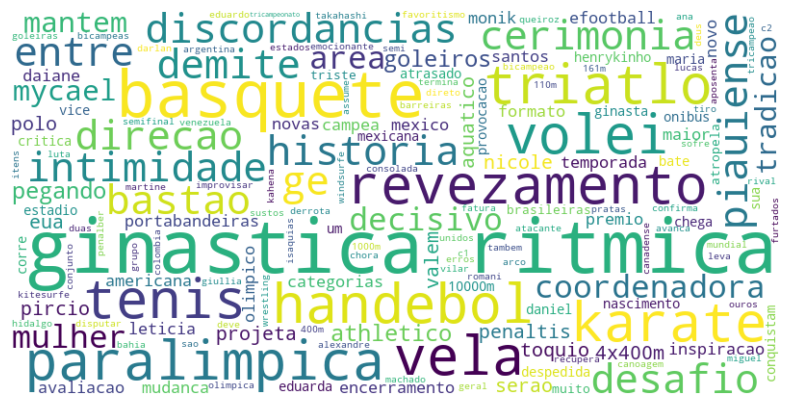

In [446]:
# Criar nuvem de palavras para o Título
wordcloud_title = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(all_title_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation="bilinear")
plt.axis('off')
plt.show()

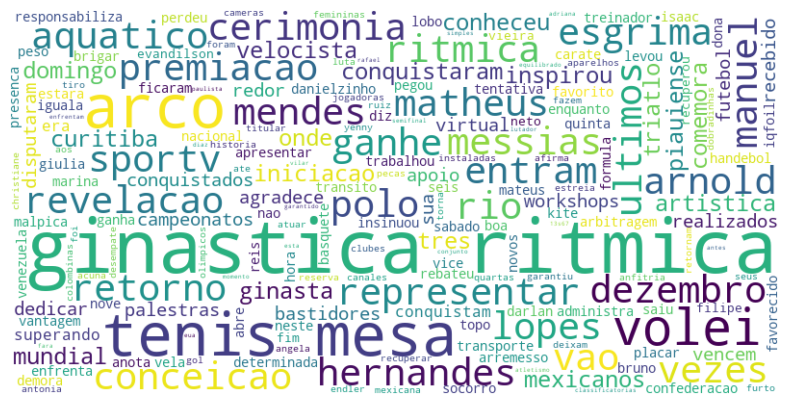

In [448]:
# Criar nuvem de palavras para o Subtítulo
wordcloud_subtitle = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(all_subtitle_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_subtitle, interpolation="bilinear")
plt.axis('off')
plt.show()

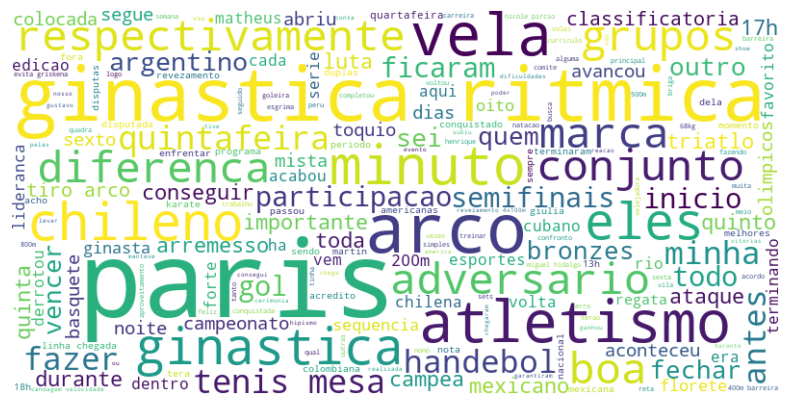

In [425]:
# Criar nuvem de palavras para o Texto da Matéria
wordcloud_text = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(all_text_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_text, interpolation="bilinear")
plt.axis('off')
plt.show()

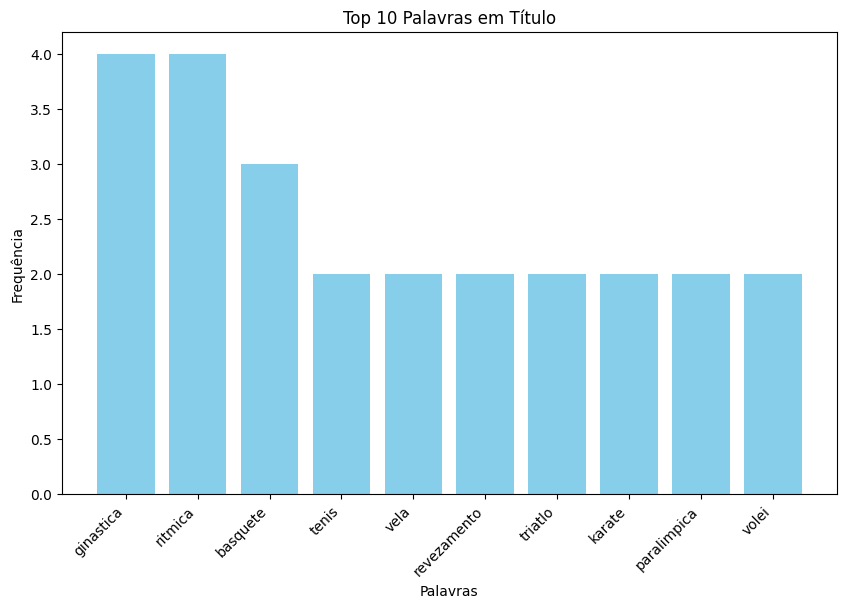

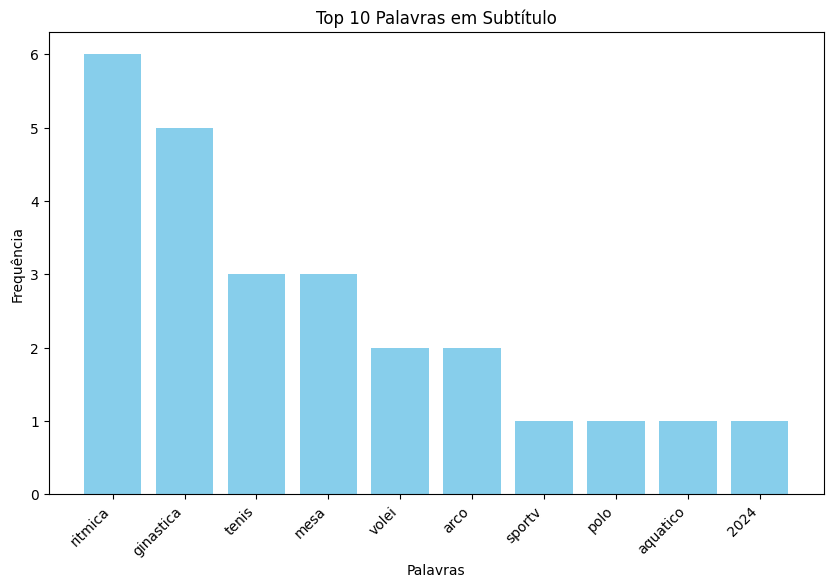

In [439]:
from collections import Counter

# Criar e exibir o gráfico de histograma
def plot_top_words_histogram(text, title):
    words = text.split() # Tokenizar as palavras
    word_freq = Counter(words) # Contar a frequência das palavras
    top_words = word_freq.most_common(10) # 10 palavras mais frequentes
    words, counts = zip(*top_words) # Separar as palavras e suas contagens
    
    # Histograma
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f'Top 10 Palavras em {title}')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Histograma para cada tipo
plot_top_words_histogram(all_title_text, 'Título')
plot_top_words_histogram(all_subtitle_text, 'Subtítulo')


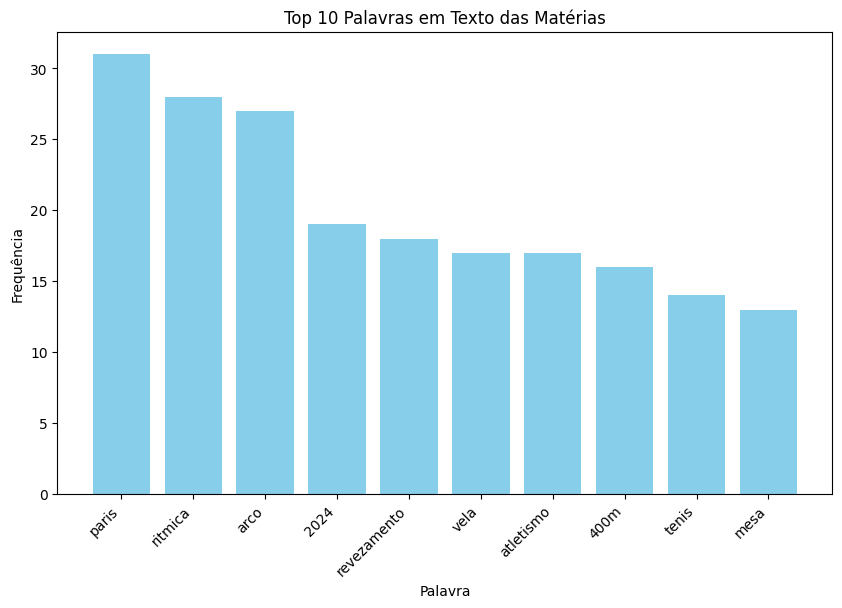

In [441]:
# Counter para contar a frequência das palavras no campo "Texto da materia"
counter_text = Counter(all_text_text.split())

# Extrair as 11 palavras mais frequentes, pois a primeira palavra era um traço (-) que não estava sendo filtrado
top_words = counter_text.most_common(11)

# Remover a palavra mais frequente, pois a primeira palavra era um traço (-) que não estava sendo filtrado
top_words = top_words[1:]

# DataFrame com as palavras e suas frequências
df_top_words = pd.DataFrame(top_words, columns=['Palavra', 'Frequencia'])

# Gráfico de histograma
plt.figure(figsize=(10, 6))
plt.bar(df_top_words['Palavra'], df_top_words['Frequencia'], color='skyblue')
plt.title('Top 10 Palavras em Texto das Matérias')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.show()